In [158]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')


In [159]:
dia= pd.read_csv('diabetes.csv')

In [160]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explore Data

In [161]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [162]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [163]:
dia.duplicated().sum()

0

In [164]:
print(dia.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# analysis

In [165]:
dia.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

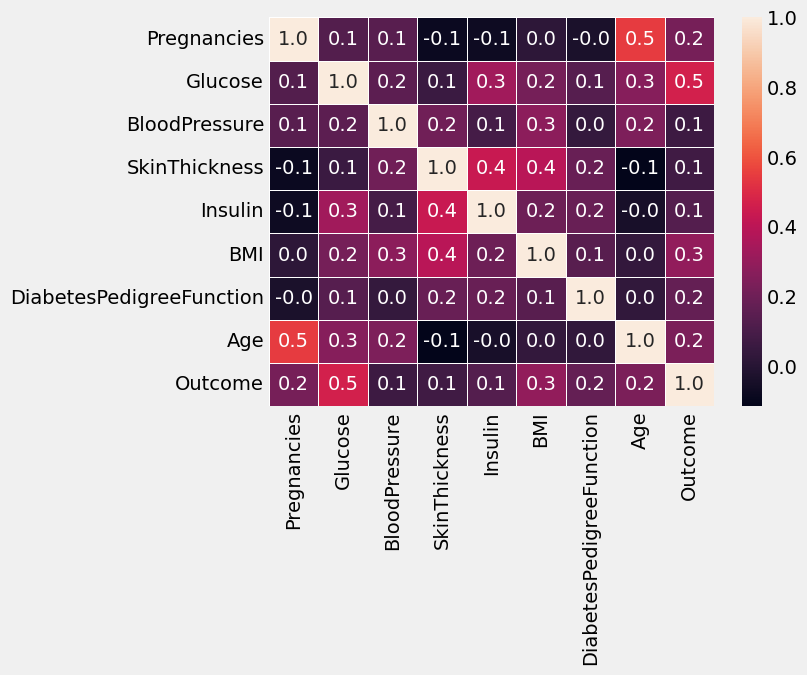

In [166]:
sns.heatmap(dia.corr(), annot= True,fmt='0.1f', linewidth=.5)

<Axes: xlabel='Outcome', ylabel='count'>

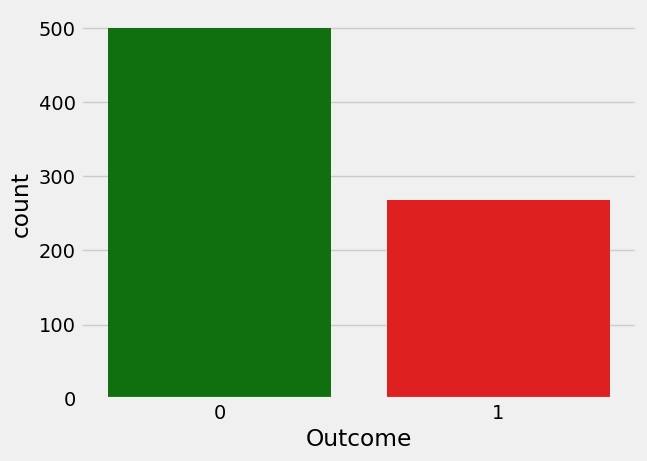

In [167]:
sns.countplot(x= 'Outcome', data= dia,palette=['g', 'r'])

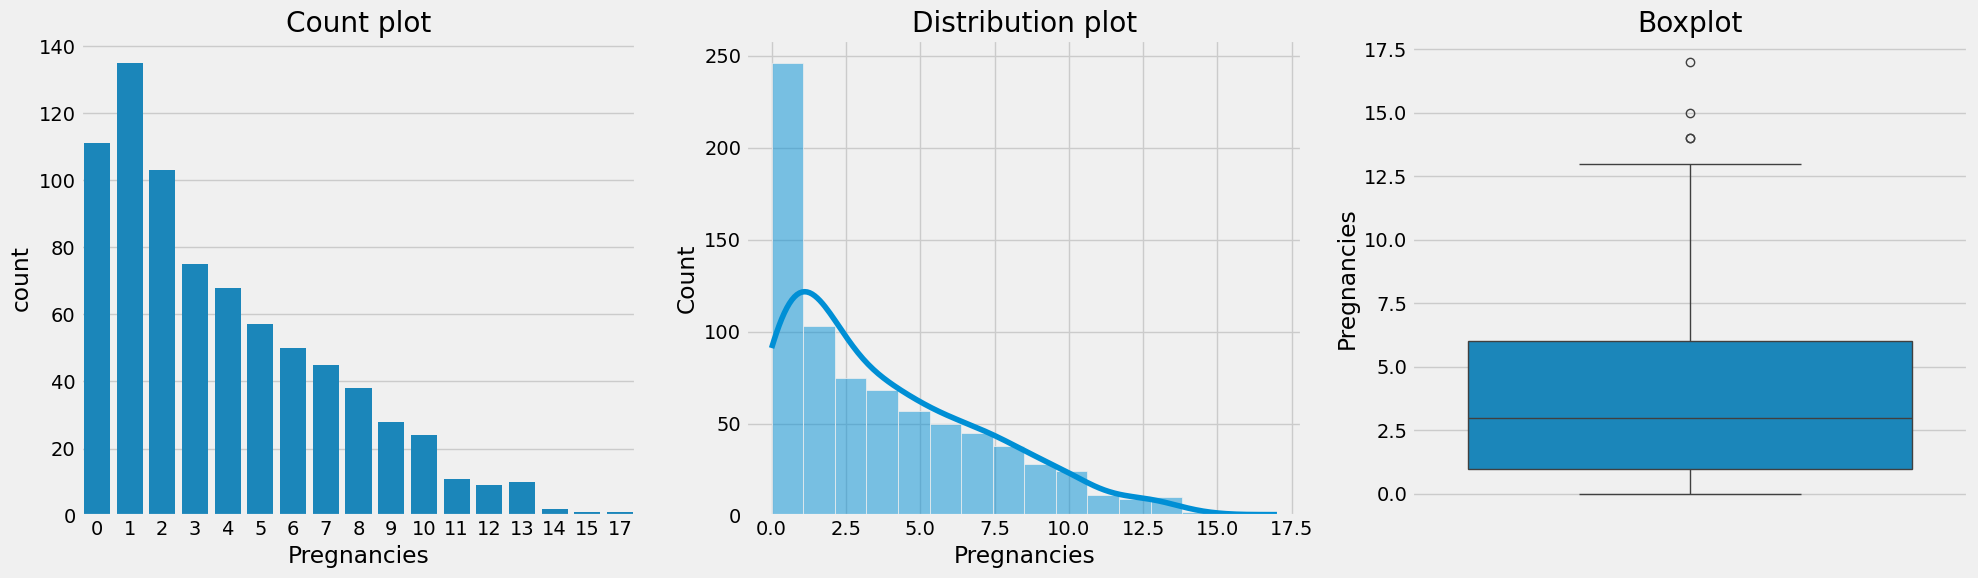

In [168]:
dia.columns = dia.columns.str.strip()

plt.figure(figsize=(20, 6))

# 1. Count plot
plt.subplot(1, 3, 1)
plt.title("Count plot")
sns.countplot(x='Pregnancies', data=dia)

# 2. Distribution plot
plt.subplot(1, 3, 2)
plt.title('Distribution plot')
sns.histplot(dia['Pregnancies'], kde=True)  # استخدم histplot بدلاً من distplot

# 3. Boxplot
plt.subplot(1, 3, 3)
plt.title('Boxplot')
sns.boxplot(y=dia['Pregnancies'])

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

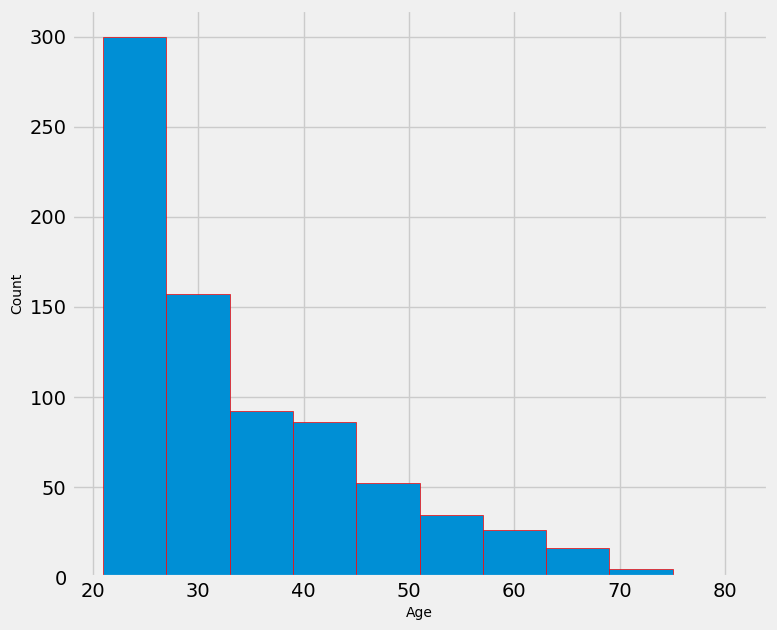

In [169]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
dia['Age'].hist(edgecolor="r")

In [170]:
dia['Age'].max()

81

In [171]:
dia['Age'].min()

21

In [172]:
print("MAX AGE: "+str(dia['Age'].max()))
print("MIN AGE: "+str(dia['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [173]:
dia.groupby("Outcome").agg({'Pregnancies':'mean'})


,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [174]:
dia.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [175]:
dia.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [176]:
dia.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


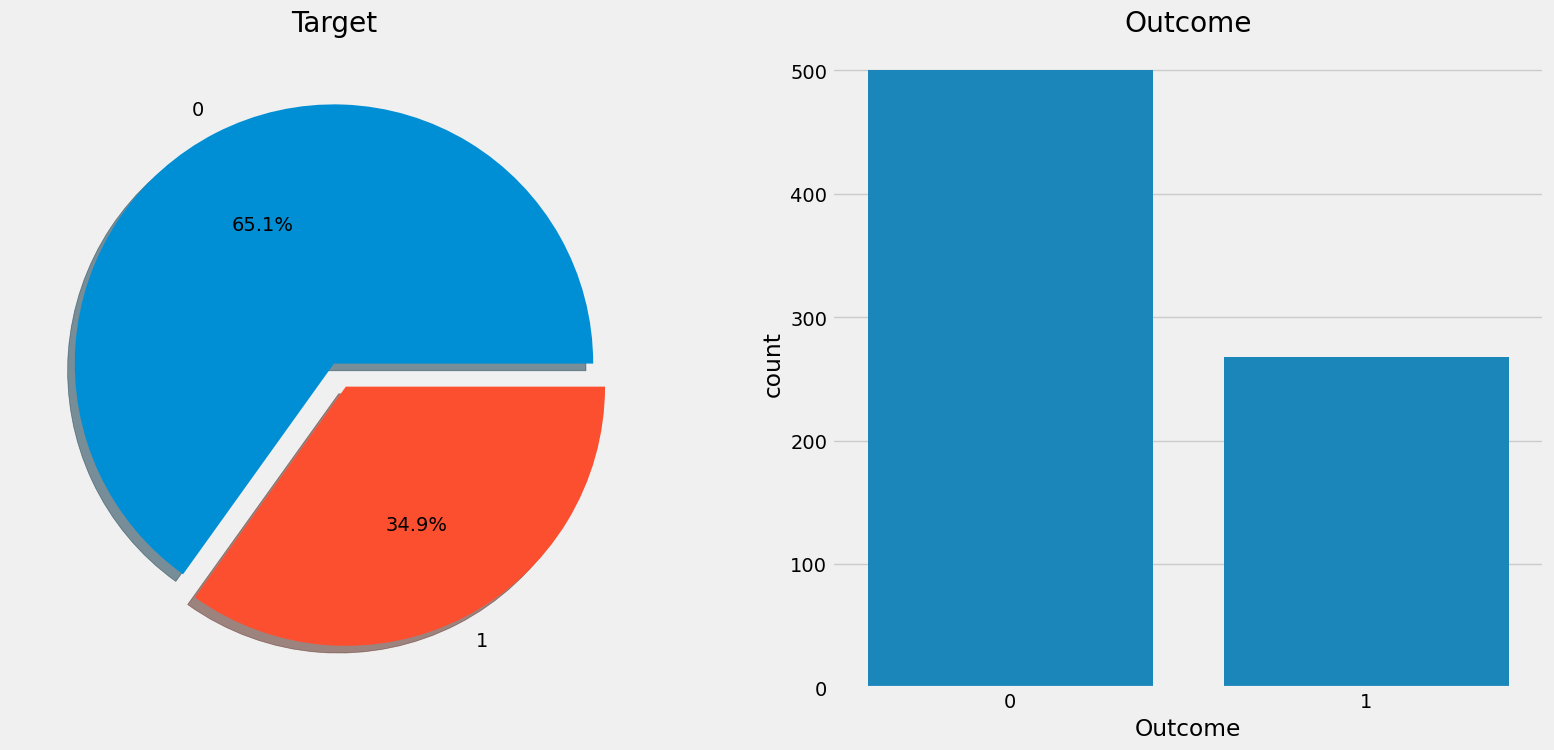

In [177]:
# 0 = healthy, 1 = diabetes
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# الرسم الدائري (Pie chart)
dia['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct="%1.1f%%",
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Target')
ax[0].set_ylabel('')

# عدّاد الأعمدة (Count plot)
sns.countplot(x='Outcome', data=dia, ax=ax[1])
ax[1].set_title('Outcome')

plt.show()

In [178]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in dia:
    Q1 = dia[feature].quantile(0.25)
    Q3 = dia[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if dia[(dia[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

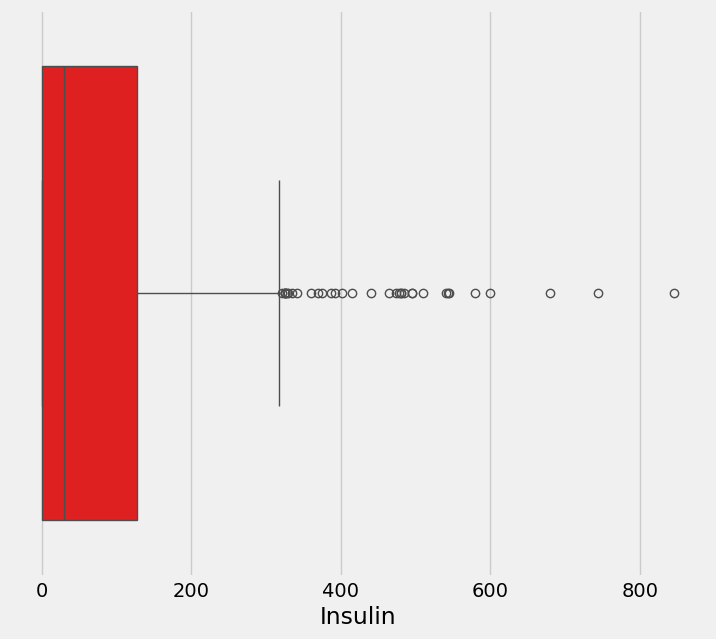

In [179]:
plt.figure(figsize=(8,7))
sns.boxplot(x= dia["Insulin"], color="red")

In [180]:
Q1 = dia.Insulin.quantile(0.25)
Q3 = dia.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
dia.loc[dia['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

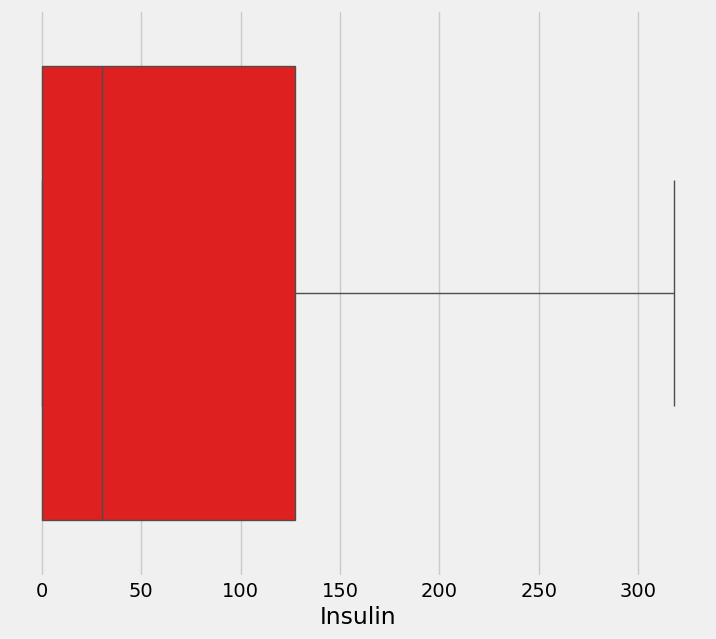

In [181]:
plt.figure(figsize=(8,7))
sns.boxplot(x= dia["Insulin"], color="red")

<Axes: xlabel='Pregnancies'>

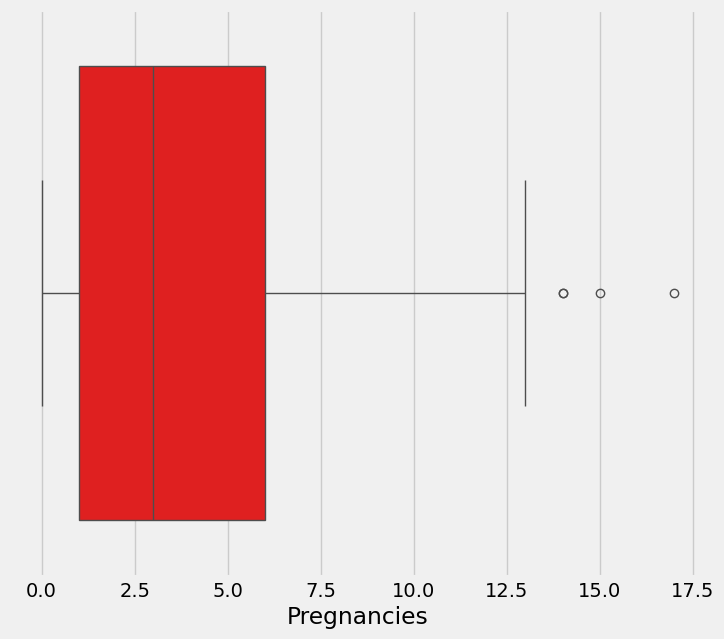

In [182]:
plt.figure(figsize=(8,7))
sns.boxplot(x= dia["Pregnancies"], color="red")

# create model

In [183]:
X= dia.drop('Outcome', axis=1)
Y= dia['Outcome']

In [184]:
#SPLIT THIS DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [185]:
model1=LogisticRegression()
model2= SVC()
model3=  RandomForestClassifier()
model4= GradientBoostingClassifier(n_estimators=1000)


 Model: Logistic Regression
 Accuracy: 0.7597402597402597
 Recall: 0.4915254237288136
 F1 Score: 0.6105263157894737


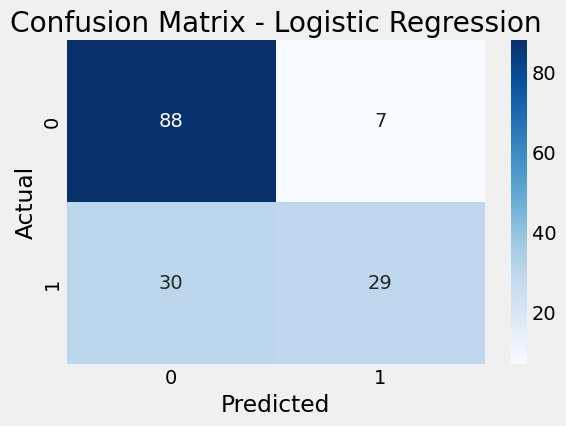

 Model: RandomForestClassifier
 Accuracy: 0.7467532467532467
 Recall: 0.5423728813559322
 F1 Score: 0.6213592233009708


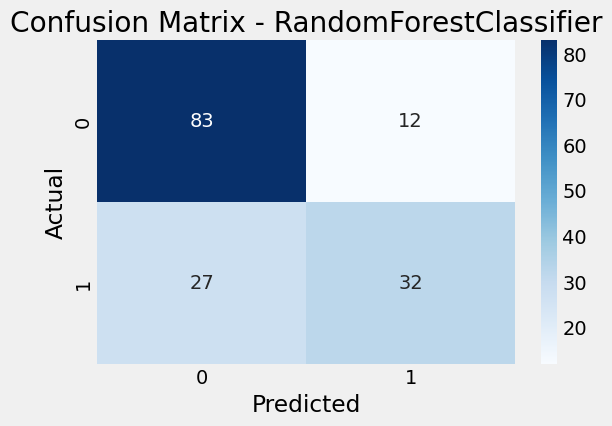

 Model:  SVC
 Accuracy: 0.7207792207792207
 Recall: 0.3898305084745763
 F1 Score: 0.5168539325842697


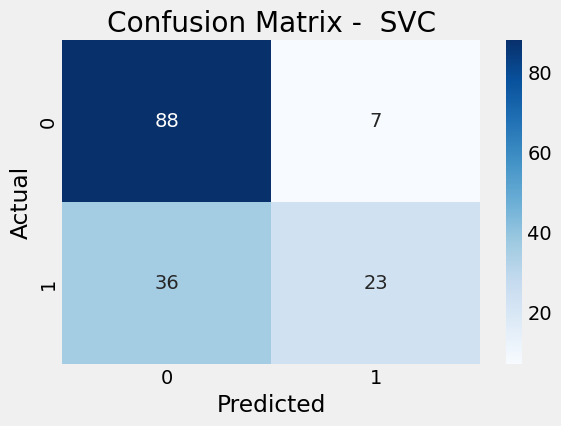

In [186]:

result1 = []  # Accuracy
result2 = []  # Recall
result3 = []  # F1-score

def cal(model, model_name):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    
    result1.append((model_name, accuracy))
    result2.append((model_name, recall))
    result3.append((model_name, f1))
    print(f' Model: {model_name}')
    print(' Accuracy:', accuracy)
    print(' Recall:', recall)
    print(' F1 Score:', f1)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3=  SVC()


cal(model1, "Logistic Regression")
cal(model2, "RandomForestClassifier")
cal(model3, " SVC")





